K2: https://archive.stsci.edu/missions/k2/lightcurves

Kepler: https://www.kaggle.com/datasets/keplersmachines/kepler-labelled-time-series-data

Kepler2: https://github.com/KeplerGO/K2FootprintFiles/blob/master/csv/k2-footprint.csv

Kaggle-Kepler: https://www.kaggle.com/datasets/arashnic/exoplanets

TESS: https://archive.stsci.edu/missions/tess/doc/tess_drn/tess_orbit_times_by_sector.csv

In [20]:
import pandas as pd

In [22]:
k2_train = pd.read_csv('Datasets/Kepler/exoTrain.csv')
k2_test = pd.read_csv('Datasets/Kepler/exoTest.csv')

In [32]:
k2 = pd.read_csv('Datasets/k2pandc_2025.02.15_00.17.19.csv')

In [33]:
k2.shape

(3890, 94)

In [23]:
k2_train.shape

(5087, 3198)

In [29]:
k2_train["LABEL"].unique()

array([2, 1])

In [5]:
with fits.open(fits_file, mode="readonly") as hdulist:
    k2_bjds = hdulist[1].data['TIME']
    sap_fluxes = hdulist[1].data['SAP_FLUX']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']

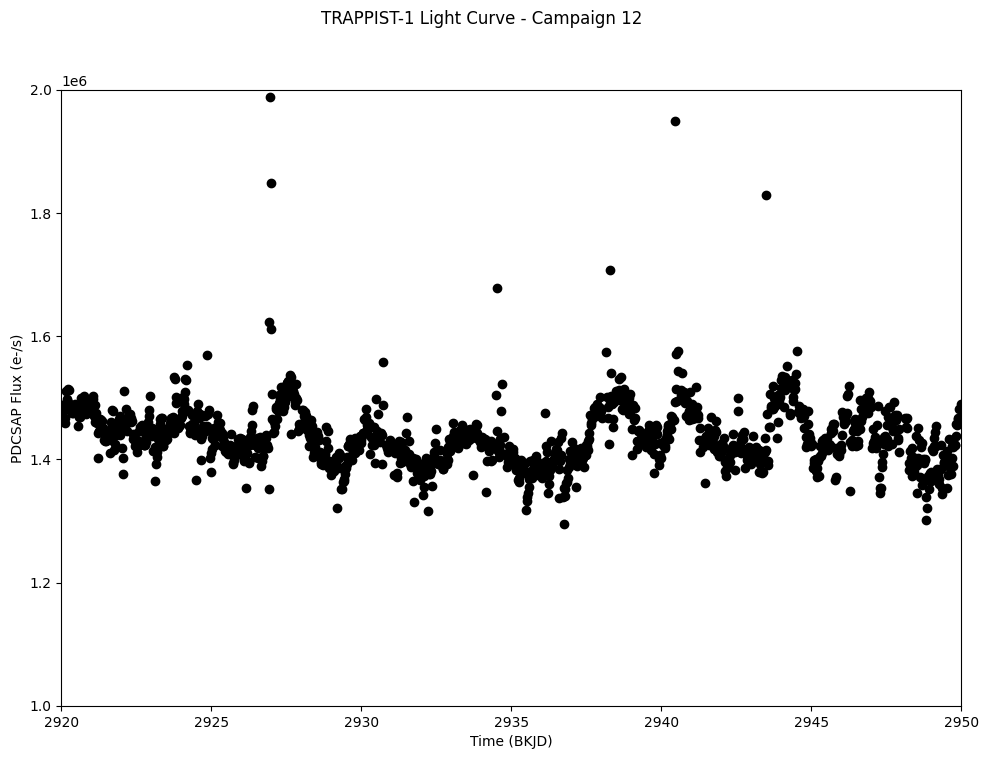

In [6]:
# Start figure and axis.
fig, ax = plt.subplots()
fig.set_size_inches(12., 8.)

# Plot the timeseries in black circles.
ax.plot(k2_bjds, pdcsap_fluxes, 'ko')

# Let's label the axes and define a title for the figure.
fig.suptitle("TRAPPIST-1 Light Curve - Campaign 12")
ax.set_ylabel("PDCSAP Flux (e-/s)")
ax.set_xlabel("Time (BKJD)")

# Let's zoom in on the x-axis and y-axis.  We can see a sinusoidal pattern due to starspots.
# The transits are in there too, but you'd need to clean the light curve before you see them.
ax.set_xlim(2920., 2950.)
ax.set_ylim(0.1e7, 0.2e7)

# Adjust the left margin so the y-axis label shows up.
plt.subplots_adjust(left=0.15)
plt.show()

In [7]:
# First we need to read in the array of cadence quality flags, let's do
# that now.
with fits.open(fits_file, mode="readonly") as hdulist:
    qual_flags = hdulist[1].data['SAP_QUALITY']

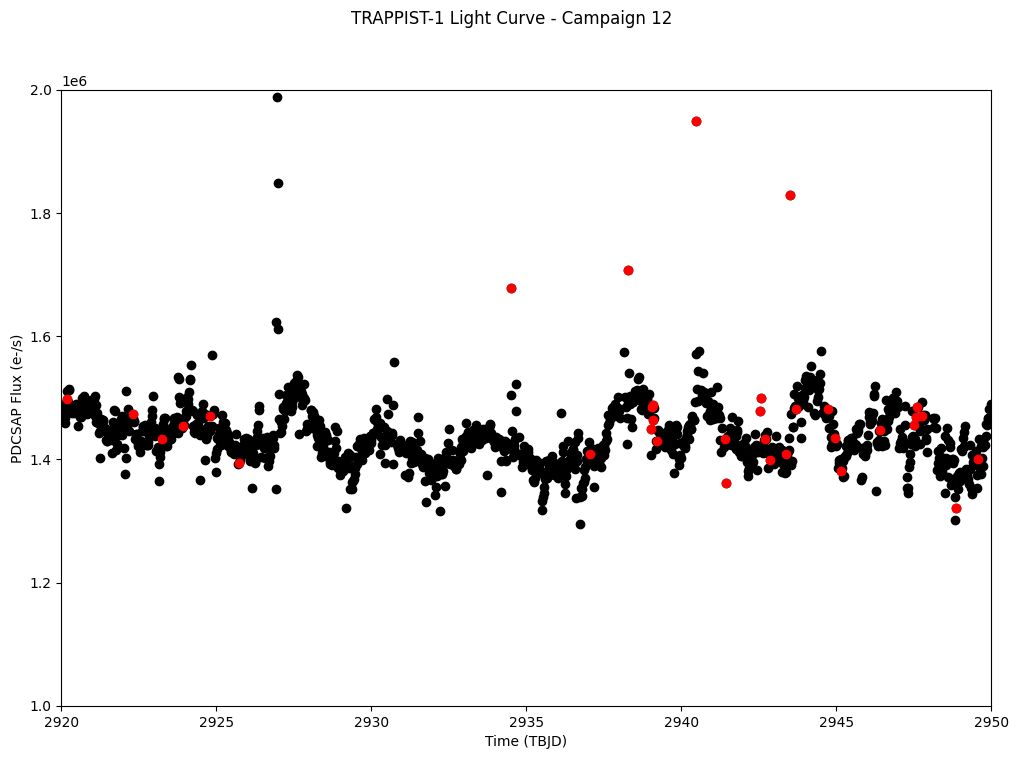

In [8]:
# Start figure and axis.
fig, ax = plt.subplots()
fig.set_size_inches(12., 8.)

# Plot the timeseries in black circles.
ax.plot(k2_bjds, pdcsap_fluxes, 'ko')

# Locate quality flags greater than zero.
where_gt0 = np.where(qual_flags > 0)[0]

# Overplot the fluxes with quality flags greater than zero in red.
ax.plot(k2_bjds[where_gt0], pdcsap_fluxes[where_gt0], 'ro')

# Let's zoom in on the x-axis and y-axis.
ax.set_xlim(2920., 2950.)
ax.set_ylim(0.1e7, 0.2e7)

# Let's label the axes and define a title for the figure.
fig.suptitle("TRAPPIST-1 Light Curve - Campaign 12")
ax.set_ylabel("PDCSAP Flux (e-/s)")
ax.set_xlabel("Time (TBJD)")
plt.show()

In [9]:
with fits.open(fits_file, mode="readonly") as hdulist:
    aperture = hdulist[2].data

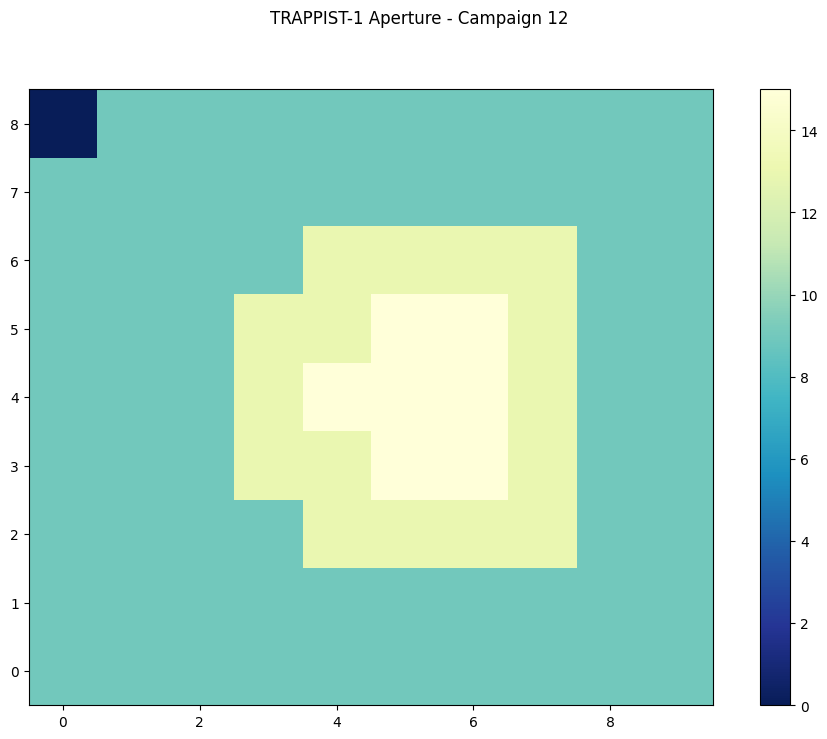

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(12., 8.)

# Display the pixels as an image.
cax = ax.imshow(aperture, cmap=plt.cm.YlGnBu_r, origin="lower")

# Add a color bar.
cbar = fig.colorbar(cax)

# Add a title to the plot.
fig.suptitle("TRAPPIST-1 Aperture - Campaign 12")
plt.show()

In [11]:
# Break down a pixel value of 15 (yellow pixels in the center above) into its constituent bits.
bitmask = np.binary_repr(15)
print(bitmask)

1111


In [18]:
import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin, urlparse

base_url = "https://archive.stsci.edu/missions/k2/lightcurves/c4/"
save_dir = "k2_data"

# Create the directory to save files
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

def download_file(file_url, save_path):
    """Download a single file from a URL to a local path."""
    print(f"Downloading: {file_url}")
    response = requests.get(file_url, stream=True)
    response.raise_for_status()
    
    with open(save_path, 'wb') as f:
        for chunk in response.iter_content(1024):
            f.write(chunk)

def crawl_and_download(url, current_dir):
    """Recursively crawl and download files from a directory URL."""
    response = requests.get(url)
    response.raise_for_status()
    soup = BeautifulSoup(response.text, 'html.parser')

    # Loop through all links on the page
    for link in soup.find_all('a'):
        href = link.get('href')
        
        # Ignore navigation links and query parameters
        if href in ['../', './'] or '?' in href:
            continue
        
        # Construct the full URL
        full_url = urljoin(url, href)
        
        # Check if it's a directory (ends with '/')
        if href.endswith('/'):
            new_dir = os.path.join(current_dir, href.strip('/'))
            if not os.path.exists(new_dir):
                os.makedirs(new_dir)
            
            # Recursively crawl the subdirectory
            crawl_and_download(full_url, new_dir)
        
        # Otherwise, treat as a file and download it
        else:
            file_path = os.path.join(current_dir, href)
            download_file(full_url, file_path)

# Start crawling and downloading from the base URL
crawl_and_download(base_url, save_dir)

OSError: [Errno 63] File name too long: 'k2_data/missions/k2/lightcurves/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/anc-eng/missions/k2/missions'

In [68]:
# For the purposes of this tutorial, we just know the MAST URL location of the file we want to examine.
fits_file = "https://archive.stsci.edu/missions/k2/lightcurves/c4/210400000/03000/ktwo210403190-c04_llc.fits"


In [69]:
fits.getdata(fits_file, ext=1)

FITS_rec([(2228.80032548,  0.00528026, 103744, 54096.777, 7.304056 , 3112.5159, 1.1891371,       nan,       nan, 524288, 977.20948985, 8.7626569e-05, 952.54381669, 8.0677586e-05, 977.19629304, 0.00019403, 952.54605684, 0.00017434,  6.0548109e-01, -1.5170304e-01),
          (2228.82075796,  0.00527904, 103745, 54090.812, 7.3050284, 3107.361 , 1.1948681, 58791.23 , 7.8076253, 262144, 977.19022538, 9.1116846e-05, 952.54480006, 8.0570964e-05, 977.17864927, 0.00019356, 952.5489517 , 0.00017439,  5.8790886e-01, -1.5060756e-01),
          (2228.84119033,  0.00527781, 103746, 54091.707, 7.3026266, 3108.7996, 1.1795938, 58816.83 , 7.812761 , 262144, 977.16871671, 9.2792703e-05, 952.54462164, 8.0489488e-05, 977.15997211, 0.00019301, 952.55050403, 0.00017445,  5.6799859e-01, -1.5064180e-01),
          ...,
          (2299.63731259, -0.00103683, 107211, 55571.824, 7.5002856, 5362.0483, 1.250075 , 58440.105, 8.142275 , 262144, 976.48412267, 6.6072571e-05, 952.65714154, 6.2855659e-05, 976.49468259, 

In [70]:
fits.getdata(fits_file, ext=1).columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2454833'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E13.6'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; uni

In [71]:
fits.info(fits_file)

Filename: /Users/shivaram/.astropy/cache/download/url/0666d3157fb9738e0bafa80b004ef36b/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      55   ()      
  1  LIGHTCURVE    1 BinTableHDU    156   3470R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (12, 12)   int32   


In [81]:
import os
import re
import requests
from urllib.parse import urljoin, urlparse
from bs4 import BeautifulSoup

# Base URL for K2 lightcurves
BASE_URL = "https://archive.stsci.edu/missions/k2/lightcurves/c0/"

# Track visited URLs to avoid repetition
visited_urls = set()

# Counter for FITS files
fits_file_count = 0

def is_fits_file(url):
    """ Check if the URL points to a FITS file. """
    return url.endswith('.fits')

def should_ignore_url(url):
    """ Ignore URLs with sorting parameters and irrelevant directories. """
    if ('?C=' in url and 'O=' in url):
        return True
    if any(skip in url for skip in ['anc-eng', 'anc-history', 'index.html']):
        return True
    return False

def crawl_directory(url):
    """ Recursively crawl directories to count FITS files. """
    global fits_file_count

    if url in visited_urls:
        return 
    visited_urls.add(url)

    print(f"Visiting: {url}")
    if should_ignore_url(url):
        print(f"[SKIP] Ignoring URL: {url}")
        return
    
    try:
        response = requests.get(url)
        response.raise_for_status()
    except requests.HTTPError as e:
        print(f"[ERROR] Failed to access {url}: {e}")
        return

    soup = BeautifulSoup(response.text, 'html.parser')

    for link in soup.find_all('a'):
        href = link.get('href')
        if href and href != '../':  
            full_url = urljoin(url, href)
            parsed_url = urlparse(full_url)
            if is_fits_file(full_url):
                fits_file_count += 1
                print(f"[FOUND] FITS file: {full_url}")
                
            elif parsed_url.path.endswith('/'):
                if BASE_URL in full_url:
                    crawl_directory(full_url)

if __name__ == "__main__":
    crawl_directory(BASE_URL)
    print(f"\nTotal number of FITS files: {fits_file_count}")

Visiting: https://archive.stsci.edu/missions/k2/lightcurves/c0/
Visiting: https://archive.stsci.edu/missions/k2/lightcurves/c0/?C=N;O=D
[SKIP] Ignoring URL: https://archive.stsci.edu/missions/k2/lightcurves/c0/?C=N;O=D
Visiting: https://archive.stsci.edu/missions/k2/lightcurves/c0/?C=M;O=A
[SKIP] Ignoring URL: https://archive.stsci.edu/missions/k2/lightcurves/c0/?C=M;O=A
Visiting: https://archive.stsci.edu/missions/k2/lightcurves/c0/?C=S;O=A
[SKIP] Ignoring URL: https://archive.stsci.edu/missions/k2/lightcurves/c0/?C=S;O=A
Visiting: https://archive.stsci.edu/missions/k2/lightcurves/c0/?C=D;O=A
[SKIP] Ignoring URL: https://archive.stsci.edu/missions/k2/lightcurves/c0/?C=D;O=A
Visiting: https://archive.stsci.edu/missions/k2/lightcurves/c0/200000000/
Visiting: https://archive.stsci.edu/missions/k2/lightcurves/c0/200000000/?C=N;O=D
[SKIP] Ignoring URL: https://archive.stsci.edu/missions/k2/lightcurves/c0/200000000/?C=N;O=D
Visiting: https://archive.stsci.edu/missions/k2/lightcurves/c0/2000

In [ ]:
import os
import re
import requests
from urllib.parse import urljoin, urlparse
from bs4 import BeautifulSoup
from concurrent.futures import ThreadPoolExecutor, as_completed
import time

# Base URL for K2 lightcurves
BASE_URL = "https://archive.stsci.edu/missions/k2/lightcurves/c0/"

# Directory to store downloaded FITS files
FITS_OUTPUT_DIR = "fits_files"

# Create output directory if it doesn't exist
if not os.path.exists(FITS_OUTPUT_DIR):
    os.makedirs(FITS_OUTPUT_DIR)

# Track visited URLs and downloaded EPICs
visited_urls = set()  
downloaded_epics = set()

# Batch settings
BATCH_SIZE = 10  # Number of files to process before saving checkpoint
CHECKPOINT_FILE = os.path.join(FITS_OUTPUT_DIR, 'checkpoint.txt')

# Load checkpoint if exists
if os.path.exists(CHECKPOINT_FILE):
    with open(CHECKPOINT_FILE, 'r') as f:
        downloaded_epics = set(line.strip() for line in f.readlines())

def extract_epic(filename):
    """ Extracts EPIC number from the filename """
    match = re.search(r'ktwo(\d+)-', filename)
    if match:
        return match.group(1)
    return None

def is_fits_file(url):
    """ Check if the URL points to a FITS file. """
    return url.endswith('.fits')

def should_ignore_url(url):
    """ Ignore URLs with sorting parameters and irrelevant directories. """
    if ('?C=' in url and 'O=' in url):
        return True
    if any(skip in url for skip in ['anc-eng', 'anc-history', 'index.html']):
        return True
    return False

def save_checkpoint():
    """ Save the list of downloaded EPICs to a checkpoint file """
    with open(CHECKPOINT_FILE, 'w') as f:
        for epic in downloaded_epics:
            f.write(f"{epic}\n")

def download_fits(url, epic_id):
    """ Download FITS file from URL and save to disk """
    try:
        filename = os.path.basename(urlparse(url).path)
        output_file = os.path.join(FITS_OUTPUT_DIR, filename)
        
        # Check if file already exists to avoid re-downloading
        if os.path.exists(output_file):
            print(f"[SKIP] Already downloaded: {filename}")
            return
        
        print(f"[DOWNLOAD] Starting download for {filename}")
        response = requests.get(url, stream=True)
        response.raise_for_status()
        
        # Stream the download to avoid memory overload
        with open(output_file, 'wb') as file:
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)

        downloaded_epics.add(epic_id)
        print(f"[COMPLETE] Downloaded {filename}")
        
    except Exception as e:
        print(f"[ERROR] Failed to download {url}: {e}")

def crawl_directory(url):
    """ Recursively crawl directories to find and download FITS files. """
    if url in visited_urls:
        return 
    visited_urls.add(url)

    print(f"Visiting: {url}")
    if should_ignore_url(url):
        print(f"[SKIP] Ignoring URL: {url}")
        return
    
    try:
        response = requests.get(url)
        response.raise_for_status()
    except requests.HTTPError as e:
        print(f"[ERROR] Failed to access {url}: {e}")
        return

    soup = BeautifulSoup(response.text, 'html.parser')
    fits_urls = []

    for link in soup.find_all('a'):
        href = link.get('href')
        if href and href != '../':  
            full_url = urljoin(url, href)
            parsed_url = urlparse(full_url)
            if is_fits_file(full_url):
                filename = os.path.basename(parsed_url.path)
                epic_id = extract_epic(filename)

                # Skip already downloaded EPICs
                if epic_id in downloaded_epics:
                    print(f"[SKIP] Already downloaded EPIC {epic_id}")
                    continue
                
                fits_urls.append((full_url, epic_id))
                
            elif parsed_url.path.endswith('/'):
                if BASE_URL in full_url:
                    crawl_directory(full_url)

    # Process FITS files in parallel
    with ThreadPoolExecutor(max_workers=6) as executor:  # Adjust max_workers for optimal performance
        futures = [executor.submit(download_fits, url, epic_id) for url, epic_id in fits_urls]
        
        batch_counter = 0
        for future in as_completed(futures):
            future.result()  # This ensures that exceptions are raised
            batch_counter += 1
            
            if batch_counter >= BATCH_SIZE:
                save_checkpoint()  # Save progress after each batch
                batch_counter = 0

        # Save remaining data
        save_checkpoint()

if __name__ == "__main__":
    start_time = time.time()
    crawl_directory(BASE_URL)
    end_time = time.time()
    print(f"Total time taken: {end_time - start_time:.2f} seconds")

Visiting: https://archive.stsci.edu/missions/k2/lightcurves/c0/
Visiting: https://archive.stsci.edu/missions/k2/lightcurves/c0/?C=N;O=D
[SKIP] Ignoring URL: https://archive.stsci.edu/missions/k2/lightcurves/c0/?C=N;O=D
Visiting: https://archive.stsci.edu/missions/k2/lightcurves/c0/?C=M;O=A
[SKIP] Ignoring URL: https://archive.stsci.edu/missions/k2/lightcurves/c0/?C=M;O=A
Visiting: https://archive.stsci.edu/missions/k2/lightcurves/c0/?C=S;O=A
[SKIP] Ignoring URL: https://archive.stsci.edu/missions/k2/lightcurves/c0/?C=S;O=A
Visiting: https://archive.stsci.edu/missions/k2/lightcurves/c0/?C=D;O=A
[SKIP] Ignoring URL: https://archive.stsci.edu/missions/k2/lightcurves/c0/?C=D;O=A
Visiting: https://archive.stsci.edu/missions/k2/lightcurves/c0/200000000/
Visiting: https://archive.stsci.edu/missions/k2/lightcurves/c0/200000000/?C=N;O=D
[SKIP] Ignoring URL: https://archive.stsci.edu/missions/k2/lightcurves/c0/200000000/?C=N;O=D
Visiting: https://archive.stsci.edu/missions/k2/lightcurves/c0/2000